In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv") #これはモデル学習のための？SalePriceないけどどうやって使うん？
df

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
0,14.0,16.0,6.0,96.0,42.0,2.0,196.0,2.0,5.0,2.000000,...,2.0,2.0,7.0,0.0,4.000000,84.000000,1.000000,2.0,548.0,208500.0
1,11.0,20.0,5.0,70.0,31.0,1.0,0.0,1.0,2.0,2.000000,...,2.0,1.0,4.0,1.0,4.000000,55.000000,1.000000,2.0,460.0,181500.0
2,14.0,16.0,6.0,99.0,53.0,2.0,162.0,2.0,5.0,2.000000,...,2.0,2.0,4.0,1.0,4.000000,89.000000,1.000000,2.0,608.0,223500.0
3,9.0,17.0,6.0,31.0,16.0,1.0,0.0,1.0,1.0,1.000000,...,0.0,2.0,5.0,1.0,1.000000,77.000000,0.000000,4.0,642.0,140000.0
4,14.0,24.0,7.0,87.0,38.0,2.0,350.0,2.0,5.0,2.000000,...,2.0,2.0,8.0,1.0,4.000000,76.000000,1.000000,4.0,836.0,250000.0
5,6.0,11.0,4.0,90.0,47.0,1.0,0.0,1.0,4.0,2.000000,...,0.0,1.0,3.0,0.0,4.000000,83.000000,0.000000,2.0,480.0,143000.0
6,11.0,19.0,7.0,85.0,50.0,3.0,186.0,2.0,5.0,3.000000,...,2.0,2.0,5.0,1.0,4.000000,78.000000,1.000000,2.0,636.0,307000.0
7,14.0,13.0,6.0,40.0,15.0,3.0,240.0,1.0,2.0,2.000000,...,2.0,1.0,5.0,2.0,4.000000,26.000000,1.000000,2.0,484.0,200000.0
8,6.0,5.0,6.0,21.0,1.0,1.0,0.0,1.0,1.0,1.000000,...,2.0,1.0,7.0,2.0,1.000000,47.000000,0.000000,2.0,468.0,129900.0
9,3.0,3.0,4.0,53.0,1.0,1.0,0.0,1.0,1.0,1.000000,...,0.0,1.0,3.0,2.0,4.000000,62.000000,1.000000,1.0,205.0,118000.0


In [3]:
# DataFrameの.valuesメソッドでarrayに変換、ヒートマップから選んだ相関係数の高いやつらを抽出。
X = df.loc[:, ['Neighborhood', 'OverallQual', 'ExterQual', 'GrLivArea', 'KitchenQual',
       'GarageCars']].values
X_all = df.loc[:,['1stFlrSF', 'BsmtQual', 'ExterQual', 'Fireplaces', 'Foundation',
       'FullBath', 'GarageArea', 'GarageCars', 'GarageFinish',
       'GarageType', 'GarageYrBlt', 'GrLivArea', 'HeatingQC',
       'KitchenQual', 'MSSubClass', 'MasVnrArea', 'MasVnrType',
       'Neighborhood', 'OverallQual', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']].values
# DataFrameの.valuesメソッドでarrayに変換
y = df.loc[:, ['SalePrice']].values

In [4]:
# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
# データ全体のサンプル数を確認
print(X.shape)
print(y.shape)
# trainデータのサンプル数を確認
print(X_train.shape)
print(y_train.shape)
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

(1460, 6)
(1460, 1)
(1022, 6)
(1022, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# 定数項を出力
lr.intercept_

array([-52331.27326364])

In [7]:
# 偏回帰係数を出力
lr.coef_

array([[  2511.63037829,  12420.10795364,  10399.98233689,     53.721416  ,
         13235.08713712,  12667.69981218]])

In [8]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.803839
test : 0.769353


In [9]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse
# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** 1/2))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** 1/2))

RMSE
train: 597096009.202
test : 779348170.834


In [10]:
#RMSEが意味わかんない位大きいので,全部の説明変数ぶっこんで標準化して見落としてる変数がないか確かめてみる。
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X_all)
y_std = ss.fit_transform(y)

In [11]:
X_std.mean()

-5.4486228248429362e-18

In [12]:
y_std.mean()

1.3626846987180004e-16

In [13]:
# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# 標準偏回帰係数を出力
coef_std = lr_std.coef_
coef_std

array([[ 0.03880077,  0.09652852,  0.04945043,  0.0582587 , -0.03287776,
        -0.08126186, -0.03000193,  0.16592898,  0.03432867,  0.01498169,
         0.01465268,  0.26172222,  0.01590189,  0.09228964,  0.00127784,
         0.06675092, -0.03314941,  0.16622224,  0.17396037,  0.04127993,
         0.09550094, -0.02567085,  0.03860375]])

In [19]:
sorted(coef_std[0], key=abs)

[0.0012778353872260478,
 0.014652676044582109,
 0.014981692667332748,
 0.015901885637110952,
 -0.02567085283395544,
 -0.030001931462340009,
 -0.032877755547506153,
 -0.033149412505637799,
 0.034328665253816726,
 0.038603749452754563,
 0.038800770126263977,
 0.041279929216399835,
 0.049450426204071085,
 0.058258699567617908,
 0.066750918109285268,
 -0.08126185585016947,
 0.092289641371650133,
 0.095500936205249298,
 0.09652851970289239,
 0.16592898004031201,
 0.16622224411984243,
 0.1739603704228177,
 0.26172222119607674]

In [24]:
#上位4つをpickしてもう一回重回帰
X_picked = df.loc[:,["GarageCars", "GrLivArea", "Neighborhood", 'OverallQual']]
# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_picked, y, test_size = 0.3, random_state = 0)
# データ全体のサンプル数を確認
print(X_picked.shape)
print(y.shape)
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr_picked = LinearRegression()
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr_picked.fit(X_train, y_train)

(1460, 4)
(1460, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# 偏回帰係数を出力
lr_picked.coef_

array([[ 15310.14423532,     52.76228411,   2970.11615461,  17268.37956976]])

In [26]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr_picked.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr_picked.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.791324
test : 0.760000


In [71]:
#このRMSEが高すぎるのはどうにかならんもんか。。。
print('RMSE')
print('train: %.3f' % (mse(y_train, lr_picked.predict(X_train)) ** 1/2))
print('test : %.3f' % (mse(y_test, lr_picked.predict(X_test)) ** 1/2))

RMSE
train: 635190525.432
test : 810951501.720


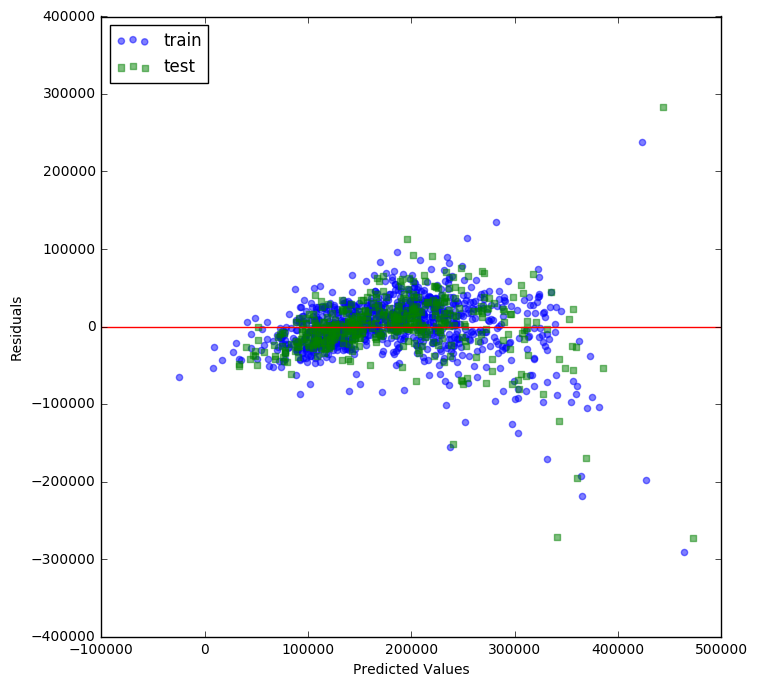

In [72]:
# 残差プロットを行う関数を定義
import seaborn as sns
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-100000, xmax=500000, color='red') # 残差0の線を表示
    plt.xlim([-100000, 500000])                             # 表示する横軸の範囲を指定
    plt.show()
# 残差プロットを出力
res_plot(y_train, lr_picked.predict(X_train), y_test, lr_picked.predict(X_test))

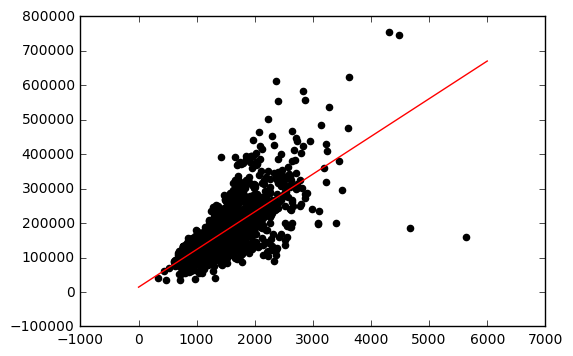

In [73]:
#一番強そうな変数を選んで多項式にしてみる。
#普通に単回帰から。
GrLivArea = df.loc[:,['GrLivArea']].values
GrLiv_train, GrLiv_test, _, _, = train_test_split(GrLivArea, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(GrLiv_train, y_train)
plt.scatter(GrLivArea, y, color = "black", label = "data")
x = np.arange(0, 6000, 1)[:, np.newaxis]# プロットのためのxを用意
plt.plot(x, model_lin.predict(x), color='red', label='linear') # 回帰直線を表示
plt.show()

In [74]:
#あんま二次関数にする必要なさそうだけどとりあえず2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)    # 2次の多項式規定を生成
GrLiv_quad = quad.fit_transform(GrLivArea) # 生成した基底関数で変数変換を実行
GrLiv_quad

array([[  1.00000000e+00,   1.71000000e+03,   2.92410000e+06],
       [  1.00000000e+00,   1.26200000e+03,   1.59264400e+06],
       [  1.00000000e+00,   1.78600000e+03,   3.18979600e+06],
       ..., 
       [  1.00000000e+00,   2.34000000e+03,   5.47560000e+06],
       [  1.00000000e+00,   1.07800000e+03,   1.16208400e+06],
       [  1.00000000e+00,   1.25600000e+03,   1.57753600e+06]])

In [75]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
GrLiv_quad_train, GrLiv_quad_test, _, _ = train_test_split(GrLiv_quad, y, test_size = 0.3, random_state = 0)
# 線形回帰のインスタンスを生成
model_quad = LinearRegression()
# 変換後の変数を利用して実行
model_quad.fit(GrLiv_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

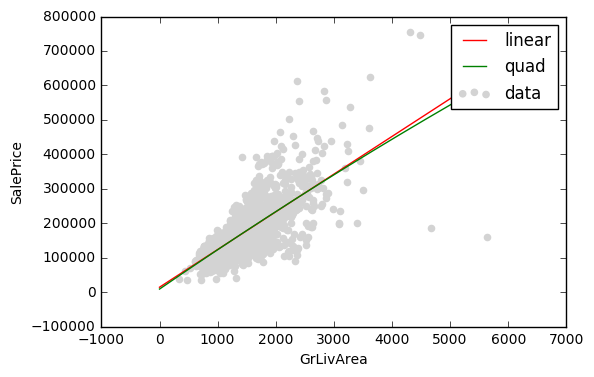

In [76]:
# 散布図に近似直線､近似曲線を重ねてみるけどこれQuadなの？ってくらい直線ぽい、、、
plt.scatter(GrLivArea, y, color='lightgray', label='data')               # 散布図を表示
plt.plot(x, model_lin.predict(x), color='red', label='linear')       # 回帰直線を表示
x_quad = quad.fit_transform(x)                                       # プロットのためのxも2変数変換する
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad') # 回帰曲線を表示（2次関数）#X一つに対して、式の中にQuadにした
                                                                    #数字を二つ入れなきゃいけないからこういう式になる。
plt.xlabel('GrLivArea')                                                  # x軸のラベルを表示
plt.ylabel('SalePrice')                                                   # y軸のラベルを表示
plt.legend(loc = 'upper right')                                      # 凡例を表示
plt.show()                                                           # 上記の内容でグラフを表示

In [77]:
# 線形回帰
print('model_linear')
print('train: %.3f' % adjusted(model_lin.score(GrLiv_train, y_train), len(y_train), 1))
print('test : %.3f' % adjusted(model_lin.score(GrLiv_test, y_test), len(y_test), 1))
print('')
# 2次関数の決定係数
print('model_quad')
print('train: %.3f' % adjusted(model_quad.score(GrLiv_quad_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_quad.score(GrLiv_quad_test, y_test), len(y_test), 2))
print('')

model_linear
train: 0.526
test : 0.450

model_quad
train: 0.525
test : 0.455



In [78]:
#結果まあ上の重回帰の方が決定係数自体は高い。